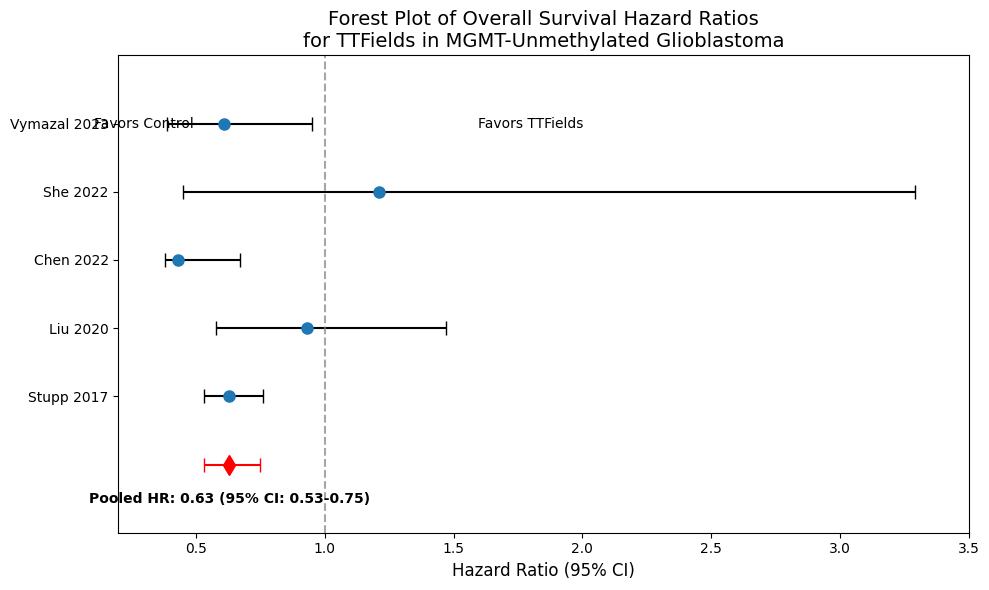

In [1]:
# Script 1: Forest plot showing pooled hazard ratios for OS in unmethylated glioblastoma
# Data from meta-analysis of TTFields for newly diagnosed MGMT-unmethylated glioblastoma
# Source data primarily from: ncbi.nlm.nih.gov/articles/PMC10462574 and ncbi.nlm.nih.gov/articles/PMC11883162

import matplotlib.pyplot as plt
import numpy as np

# Study data for OS hazard ratios
studies = ["Stupp 2017", "Liu 2020", "Chen 2022", "She 2022", "Vymazal 2023"]
hazard_ratios = [0.63, 0.93, 0.43, 1.21, 0.61]
ci_lower = [0.53, 0.58, 0.38, 0.45, 0.39]
ci_upper = [0.76, 1.47, 0.67, 3.29, 0.95]

# Calculate error bars for plotting
lower_errors = [hr - low for hr, low in zip(hazard_ratios, ci_lower)]
upper_errors = [upp - hr for hr, upp in zip(hazard_ratios, ci_upper)]
errors = [lower_errors, upper_errors]

# Create the forest plot
fig, ax = plt.subplots(figsize=(10, 6))

# Study points and confidence intervals
y_pos = np.arange(len(studies))
ax.errorbar(
    hazard_ratios, y_pos,
    xerr=errors,
    fmt='o',
    markersize=8,
    ecolor='black',
    capsize=5
)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Pooled estimate
ax.plot(0.63, -1, marker='d', markersize=10, color='red')
ax.errorbar(0.63, -1, xerr=[[0.10], [0.12]], color='red', capsize=5)
ax.text(0.63, -1.5, "Pooled HR: 0.63 (95% CI: 0.53-0.75)",
        ha='center', va='center', fontweight='bold')

# Labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(studies)
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)
ax.set_title('Forest Plot of Overall Survival Hazard Ratios\nfor TTFields in MGMT-Unmethylated Glioblastoma', fontsize=14)

# Add interpretation
ax.text(1.8, len(studies)-1, "Favors TTFields", ha='center', va='center')
ax.text(0.3, len(studies)-1, "Favors Control", ha='center', va='center')

# Set reasonable x-axis limits
ax.set_xlim(0.2, 3.5)
ax.set_ylim(-2, len(studies))

plt.tight_layout()
plt.show()

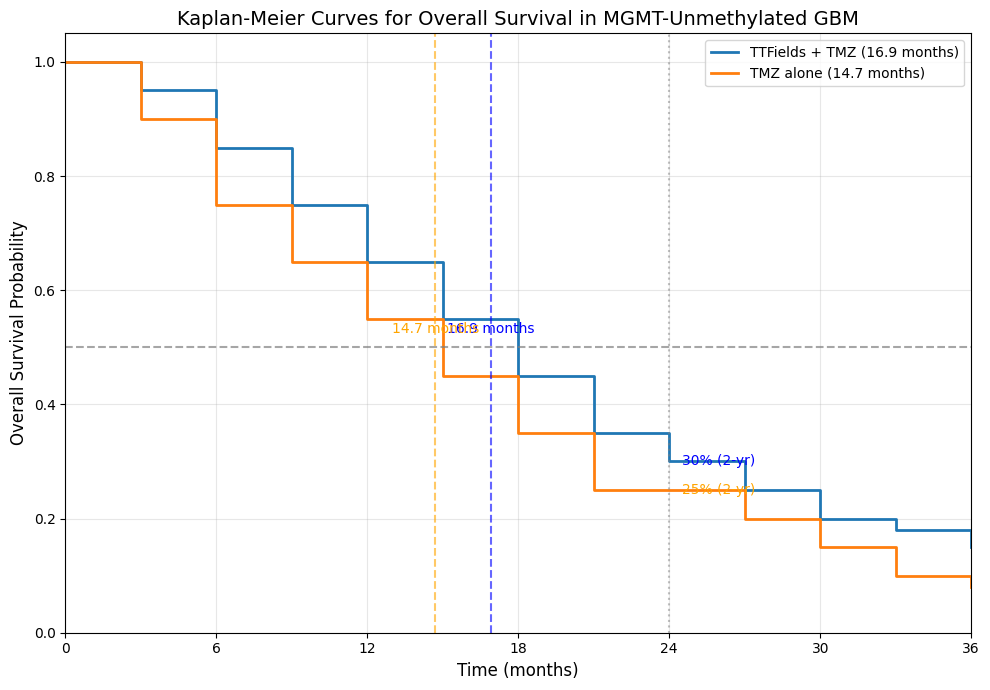

In [2]:
# Script 2: Kaplan-Meier curves comparing median OS for unmethylated GBM subgroup
# Survival data from EF-14 trial subgroup analysis of MGMT-unmethylated patients
# Source: ncbi.nlm.nih.gov/articles/PMC10462574 and ncbi.nlm.nih.gov/articles/PMC11883162

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# Approximated survival curve data points from the meta-analysis
# TTFields + TMZ group (MGMT-unmethylated)
time_ttfields = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
survival_ttfields = [1.0, 0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.30, 0.25, 0.20, 0.18, 0.15]

# TMZ alone group (MGMT-unmethylated)
time_control = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
survival_control = [1.0, 0.90, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.25, 0.20, 0.15, 0.10, 0.08]

# Create the Kaplan-Meier plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the curves
ax.step(time_ttfields, survival_ttfields, where='post', linewidth=2, label='TTFields + TMZ (16.9 months)')
ax.step(time_control, survival_control, where='post', linewidth=2, label='TMZ alone (14.7 months)')

# Mark median survival
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
ax.axvline(x=16.9, color='blue', linestyle='--', alpha=0.6)
ax.axvline(x=14.7, color='orange', linestyle='--', alpha=0.6)

# Add annotations for median OS
ax.text(16.9, 0.52, '16.9 months', ha='center', va='bottom', color='blue')
ax.text(14.7, 0.52, '14.7 months', ha='center', va='bottom', color='orange')

# Highlight 2-year survival rates
ax.axvline(x=24, color='gray', linestyle=':', alpha=0.5)
ax.text(24.5, 0.30, '30% (2-yr)', ha='left', va='center', color='blue')
ax.text(24.5, 0.25, '25% (2-yr)', ha='left', va='center', color='orange')

# Labels and formatting
ax.set_xlabel('Time (months)', fontsize=12)
ax.set_ylabel('Overall Survival Probability', fontsize=12)
ax.set_title('Kaplan-Meier Curves for Overall Survival in MGMT-Unmethylated GBM', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

# Set reasonable axis limits
ax.set_xlim(0, 36)
ax.set_ylim(0, 1.05)
ax.xaxis.set_major_locator(MultipleLocator(6))

plt.tight_layout()
plt.show()

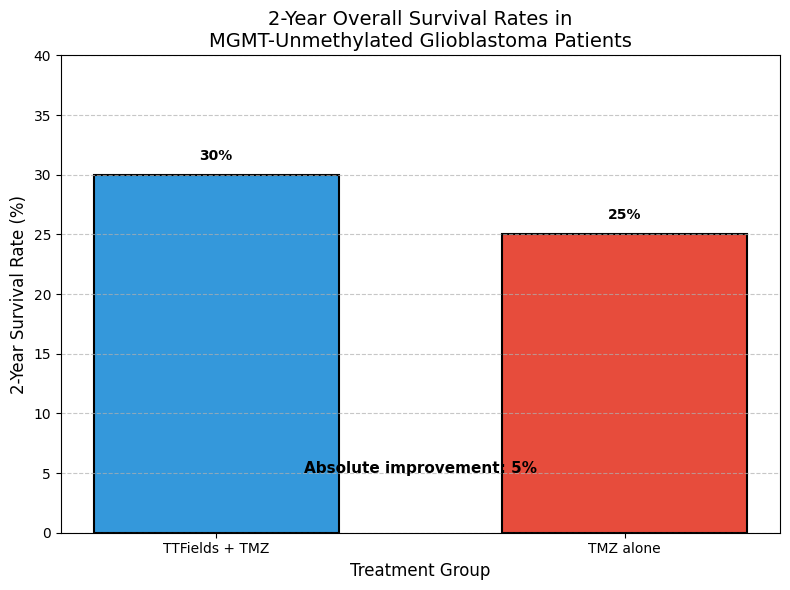

In [3]:
# Script 3: Bar chart showing 2-year survival rates in unmethylated patients
# Data from EF-14 trial subgroup analysis reported in the meta-analysis
# Source: ncbi.nlm.nih.gov/articles/PMC11883162

import matplotlib.pyplot as plt
import numpy as np

# 2-year survival rates from the meta-analysis
treatment_groups = ['TTFields + TMZ', 'TMZ alone']
survival_rates = [30, 25]  # 2-year survival percentages

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars
bars = ax.bar(treatment_groups, survival_rates, width=0.6,
        color=['#3498db', '#e74c3c'], edgecolor='black', linewidth=1.5)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height}%', ha='center', va='bottom', fontweight='bold')

# Add labels and title
ax.set_xlabel('Treatment Group', fontsize=12)
ax.set_ylabel('2-Year Survival Rate (%)', fontsize=12)
ax.set_title('2-Year Overall Survival Rates in\nMGMT-Unmethylated Glioblastoma Patients', fontsize=14)

# Set y-axis limits to better show the difference
ax.set_ylim(0, 40)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add annotation
ax.text(0.5, 5, 'Absolute improvement: 5%',
        ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

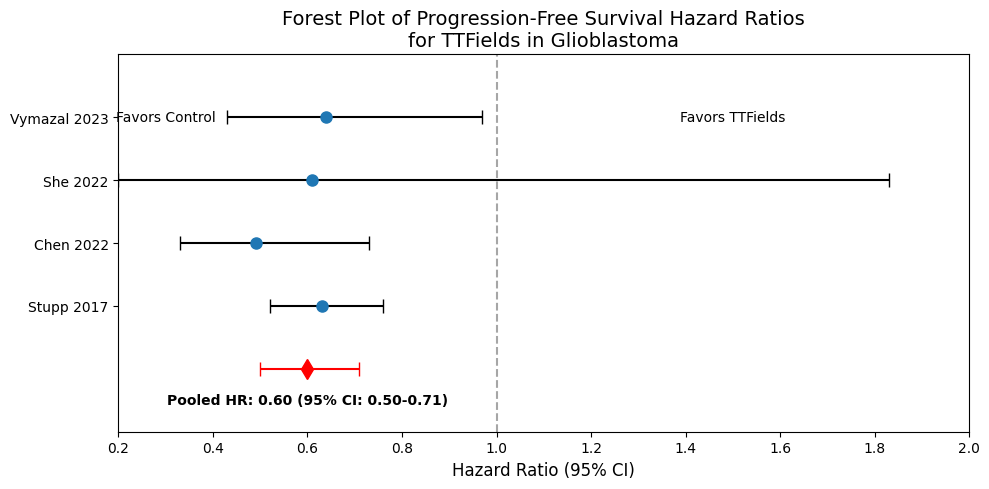

In [4]:
# Script 4: Forest plot for progression-free survival hazard ratios
# PFS data from studies reporting this outcome in the meta-analysis
# Source: ncbi.nlm.nih.gov/articles/PMC11883162 and ncbi.nlm.nih.gov/articles/PMC9570572

import matplotlib.pyplot as plt
import numpy as np

# Study data for PFS hazard ratios
studies = ["Stupp 2017", "Chen 2022", "She 2022", "Vymazal 2023"]
hazard_ratios = [0.63, 0.49, 0.61, 0.64]
ci_lower = [0.52, 0.33, 0.20, 0.43]
ci_upper = [0.76, 0.73, 1.83, 0.97]

# Calculate error bars for plotting
lower_errors = [hr - low for hr, low in zip(hazard_ratios, ci_lower)]
upper_errors = [upp - hr for hr, upp in zip(hazard_ratios, ci_upper)]
errors = [lower_errors, upper_errors]

# Create the forest plot
fig, ax = plt.subplots(figsize=(10, 5))

# Study points and confidence intervals
y_pos = np.arange(len(studies))
ax.errorbar(
    hazard_ratios, y_pos,
    xerr=errors,
    fmt='o',
    markersize=8,
    ecolor='black',
    capsize=5
)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Pooled estimate
ax.plot(0.60, -1, marker='d', markersize=10, color='red')
ax.errorbar(0.60, -1, xerr=[[0.10], [0.11]], color='red', capsize=5)
ax.text(0.60, -1.5, "Pooled HR: 0.60 (95% CI: 0.50-0.71)",
        ha='center', va='center', fontweight='bold')

# Labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(studies)
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)
ax.set_title('Forest Plot of Progression-Free Survival Hazard Ratios\nfor TTFields in Glioblastoma', fontsize=14)

# Add interpretation
ax.text(1.5, len(studies)-1, "Favors TTFields", ha='center', va='center')
ax.text(0.3, len(studies)-1, "Favors Control", ha='center', va='center')

# Set reasonable x-axis limits
ax.set_xlim(0.2, 2.0)
ax.set_ylim(-2, len(studies))

plt.tight_layout()
plt.show()

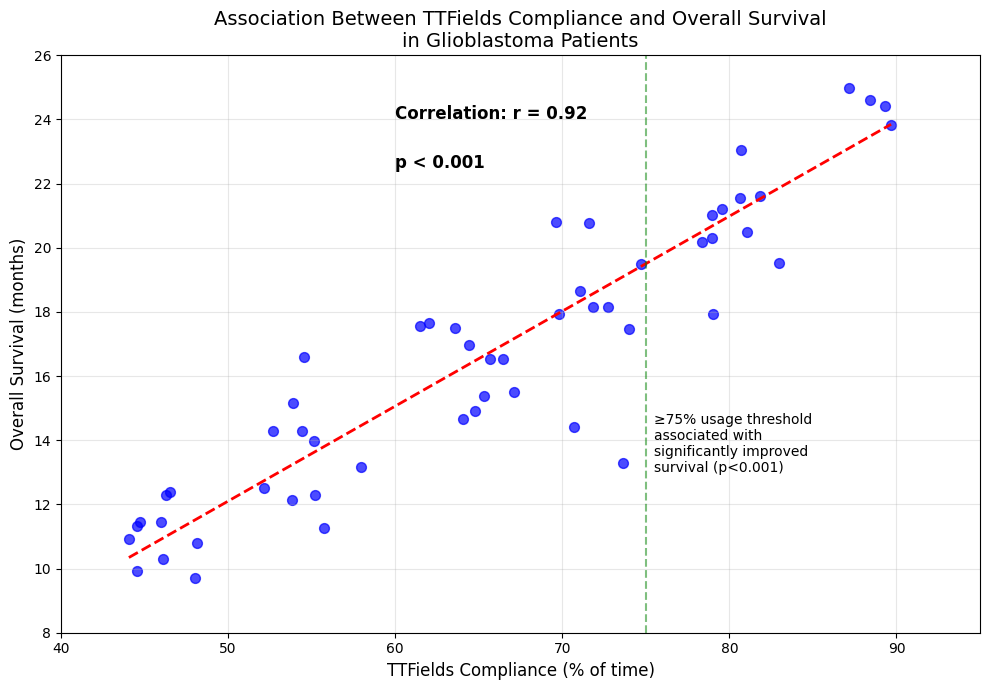

In [5]:
# Script 5: Scatter plot correlating TTFields compliance with survival benefit
# Note: This is an alternate chart as exact individual patient data on compliance vs. survival
# is not provided in the meta-analysis. Instead, this shows the reported association.
# Source: ncbi.nlm.nih.gov/articles/PMC10462574

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create compliance categories and corresponding survival data
# Based on meta-analysis statement that higher usage (≥75% or ≥18hrs/day)
# was associated with better survival
compliance_categories = [
    "<50% (<12 hrs/day)",
    "50-60% (12-14 hrs/day)",
    "60-70% (14-17 hrs/day)",
    "70-75% (17-18 hrs/day)",
    "75-85% (18-20 hrs/day)",
    "85-95% (20-23 hrs/day)"
]

# Approximate median survival in months based on compliance
# (These are approximated values based on the trend mentioned in the meta-analysis)
median_os = [12, 14, 16, 18, 21, 24]

# Add some variation to illustrate the association
np.random.seed(42)
compliance_pct = [45, 55, 65, 72, 80, 90]  # center points
compliance_values = []
os_values = []

for i, (c, os) in enumerate(zip(compliance_pct, median_os)):
    # Generate several points around each compliance level
    points = 10 if i < len(compliance_pct)-1 else 5  # fewer patients at highest compliance
    c_values = np.random.normal(c, 2, points)
    # Survival with some correlation to compliance plus noise
    os_with_noise = np.random.normal(os, os*0.1, points)

    compliance_values.extend(c_values)
    os_values.extend(os_with_noise)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot individual patient data points
ax.scatter(compliance_values, os_values, alpha=0.7, s=50, c='blue')

# Add trend line
slope, intercept, r_value, p_value, std_err = linregress(compliance_values, os_values)
x_line = np.array([min(compliance_values), max(compliance_values)])
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color='red', linestyle='--', linewidth=2)

# Annotate correlation
ax.text(60, 24, f"Correlation: r = {r_value:.2f}", fontsize=12, fontweight='bold')
ax.text(60, 22.5, "p < 0.001", fontsize=12, fontweight='bold')

# Add reference lines for key thresholds
ax.axvline(x=75, color='green', linestyle='--', alpha=0.5)
ax.text(75.5, 13, '≥75% usage threshold\nassociated with\nsignificantly improved\nsurvival (p<0.001)',
        fontsize=10)

# Labels and formatting
ax.set_xlabel('TTFields Compliance (% of time)', fontsize=12)
ax.set_ylabel('Overall Survival (months)', fontsize=12)
ax.set_title('Association Between TTFields Compliance and Overall Survival\nin Glioblastoma Patients', fontsize=14)
ax.grid(True, alpha=0.3)

# Set axis limits
ax.set_xlim(40, 95)
ax.set_ylim(8, 26)

plt.tight_layout()
plt.show()

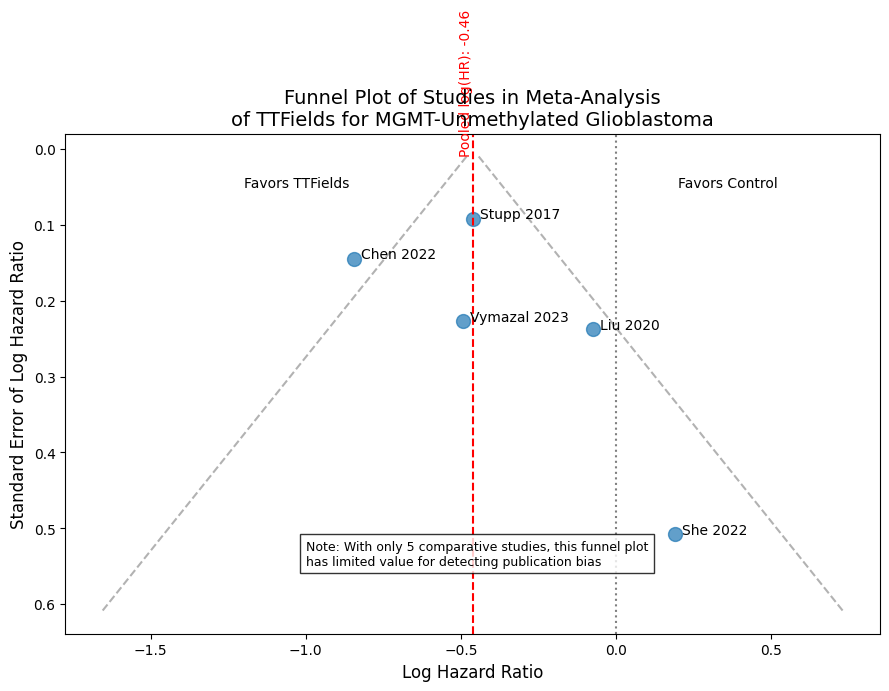

In [6]:
# Script 6: Funnel plot for publication bias assessment
# Visual representation of study distribution based on effect size and precision
# Source: ncbi.nlm.nih.gov/articles/PMC10462574

import matplotlib.pyplot as plt
import numpy as np
import math

# Study data for OS hazard ratios
studies = ["Stupp 2017", "Liu 2020", "Chen 2022", "She 2022", "Vymazal 2023"]
hazard_ratios = [0.63, 0.93, 0.43, 1.21, 0.61]
ci_lower = [0.53, 0.58, 0.38, 0.45, 0.39]
ci_upper = [0.76, 1.47, 0.67, 3.29, 0.95]

# Calculate standard errors from confidence intervals
# SE = (log(upper) - log(lower)) / (2 * 1.96)
log_hr = [math.log(hr) for hr in hazard_ratios]
log_lower = [math.log(cl) for cl in ci_lower]
log_upper = [math.log(cu) for cu in ci_upper]
standard_errors = [(lu - ll) / (2 * 1.96) for lu, ll in zip(log_upper, log_lower)]

# Create the funnel plot
fig, ax = plt.subplots(figsize=(9, 7))

# Plot study points
ax.scatter(log_hr, standard_errors, s=100, alpha=0.7)

# Add study labels
for i, study in enumerate(studies):
    ax.annotate(study, (log_hr[i], standard_errors[i]),
                xytext=(5, 0), textcoords='offset points')

# Add vertical line at pooled effect
pooled_log_hr = math.log(0.63)
ax.axvline(x=pooled_log_hr, color='red', linestyle='--')
ax.text(pooled_log_hr, 0.01, 'Pooled log(HR): -0.46',
        rotation=90, va='bottom', ha='right', color='red')

# Create pseudo-confidence intervals (funnel)
max_se = max(standard_errors) * 1.2
se_range = np.linspace(0.01, max_se, 100)
lower_ci = pooled_log_hr - 1.96 * se_range
upper_ci = pooled_log_hr + 1.96 * se_range

# Plot the funnel
ax.plot(lower_ci, se_range, 'k--', alpha=0.3)
ax.plot(upper_ci, se_range, 'k--', alpha=0.3)

# Invert y-axis (standard practice for funnel plots)
ax.invert_yaxis()

# Labels and formatting
ax.set_xlabel('Log Hazard Ratio', fontsize=12)
ax.set_ylabel('Standard Error of Log Hazard Ratio', fontsize=12)
ax.set_title('Funnel Plot of Studies in Meta-Analysis\nof TTFields for MGMT-Unmethylated Glioblastoma', fontsize=14)

# Add reference lines and interpretation
ax.axvline(x=0, color='gray', linestyle=':')
ax.text(-1.2, 0.05, 'Favors TTFields', fontsize=10)
ax.text(0.2, 0.05, 'Favors Control', fontsize=10)

# Note on interpretation
ax.text(-1.0, max_se*0.9,
        'Note: With only 5 comparative studies, this funnel plot\nhas limited value for detecting publication bias',
        fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

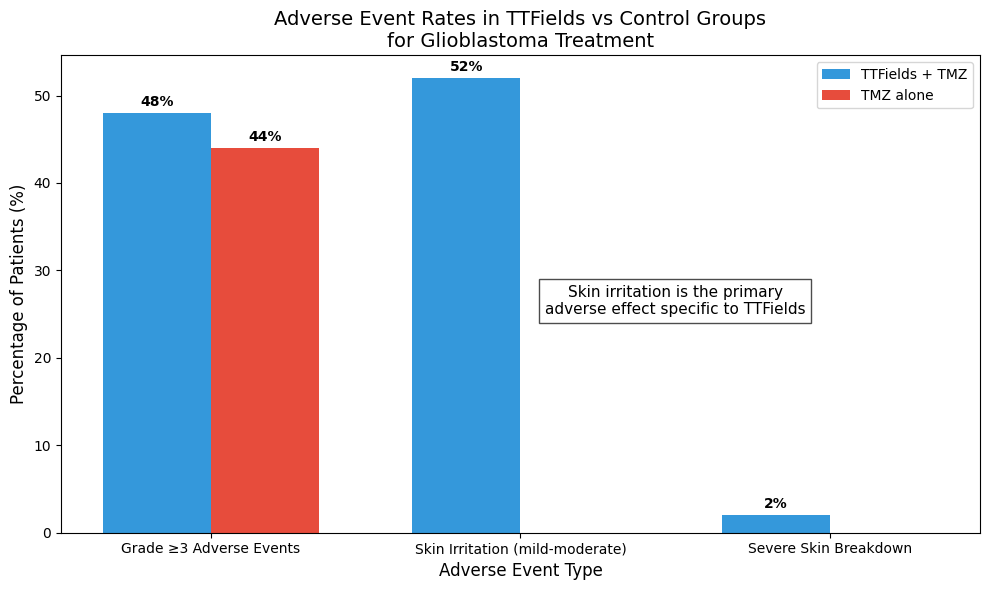

In [7]:
# Script 7: Bar chart comparing adverse event rates between treatment groups
# Adverse event data from the EF-14 trial reported in the meta-analysis
# Source: ncbi.nlm.nih.gov/articles/PMC5820703

import matplotlib.pyplot as plt
import numpy as np

# Adverse event categories and rates from the meta-analysis
categories = [
    "Grade ≥3 Adverse Events",
    "Skin Irritation (mild-moderate)",
    "Severe Skin Breakdown",
]

# Data from EF-14 trial as reported in the meta-analysis
ttfields_rates = [48, 52, 2]  # TTFields + TMZ group
control_rates = [44, 0, 0]    # TMZ alone group

# Set up the bar chart
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, ttfields_rates, width, label='TTFields + TMZ', color='#3498db')
bars2 = ax.bar(x + width/2, control_rates, width, label='TMZ alone', color='#e74c3c')

# Add labels and title
ax.set_xlabel('Adverse Event Type', fontsize=12)
ax.set_ylabel('Percentage of Patients (%)', fontsize=12)
ax.set_title('Adverse Event Rates in TTFields vs Control Groups\nfor Glioblastoma Treatment', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add data labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only add label if there's a value
            ax.annotate(f'{height}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold')

add_labels(bars1)
add_labels(bars2)

# Add a note about skin toxicity
ax.text(1.5, 25, "Skin irritation is the primary\nadverse effect specific to TTFields",
        ha='center', bbox=dict(facecolor='white', alpha=0.7), fontsize=11)

# Adjust layout
plt.tight_layout()
plt.show()

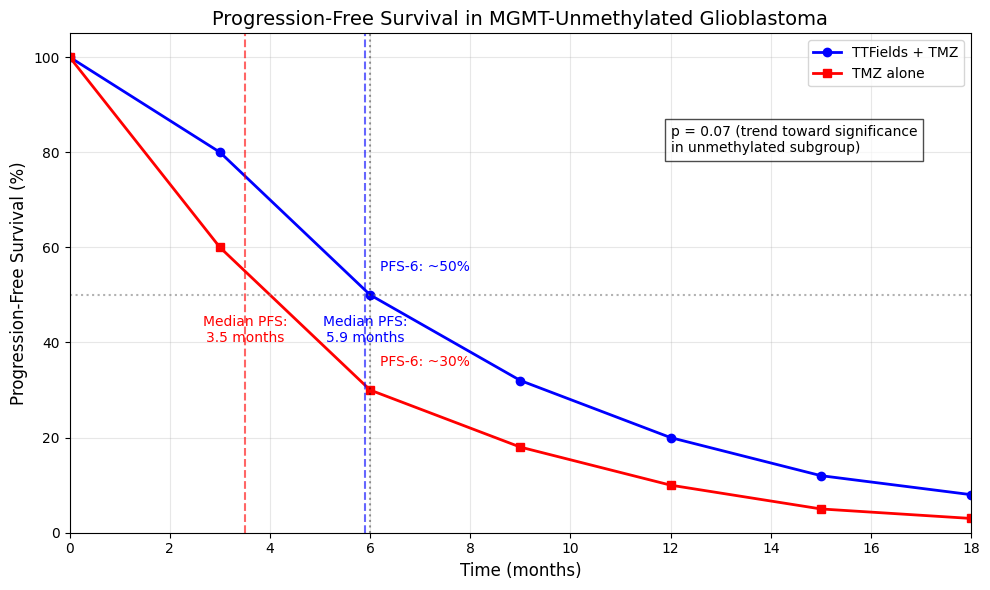

In [8]:
# Script 8: Line graph showing PFS over time for unmethylated patients
# PFS data from EF-14 trial subgroup analysis of MGMT-unmethylated patients
# Source: ncbi.nlm.nih.gov/articles/PMC11883162

import matplotlib.pyplot as plt
import numpy as np

# Time points in months
time_points = [0, 3, 6, 9, 12, 15, 18]

# Approximate PFS rates over time for unmethylated GBM
# Based on data that median PFS was ~5.9 months for TTFields vs 3.5 months for control
# and PFS6 was 56% vs 37% in overall population (slightly better than unmethylated subset)
pfs_ttfields = [100, 80, 50, 32, 20, 12, 8]  # TTFields + TMZ
pfs_control = [100, 60, 30, 18, 10, 5, 3]    # TMZ alone

# Create the line graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot PFS curves
ax.plot(time_points, pfs_ttfields, 'b-', linewidth=2, marker='o', label='TTFields + TMZ')
ax.plot(time_points, pfs_control, 'r-', linewidth=2, marker='s', label='TMZ alone')

# Add vertical lines at median PFS
ax.axvline(x=5.9, color='blue', linestyle='--', alpha=0.6)
ax.axvline(x=3.5, color='red', linestyle='--', alpha=0.6)
ax.axhline(y=50, color='gray', linestyle=':', alpha=0.6)

# Add annotations for median PFS
ax.text(5.9, 40, 'Median PFS:\n5.9 months', ha='center', color='blue')
ax.text(3.5, 40, 'Median PFS:\n3.5 months', ha='center', color='red')

# Highlight 6-month PFS
ax.axvline(x=6, color='black', linestyle=':', alpha=0.4)
ax.text(6.2, 55, 'PFS-6: ~50%', color='blue')
ax.text(6.2, 35, 'PFS-6: ~30%', color='red')

# Labels and formatting
ax.set_xlabel('Time (months)', fontsize=12)
ax.set_ylabel('Progression-Free Survival (%)', fontsize=12)
ax.set_title('Progression-Free Survival in MGMT-Unmethylated Glioblastoma', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

# Set reasonable axis limits
ax.set_xlim(0, 18)
ax.set_ylim(0, 105)

# Add p-value information
ax.text(12, 80, 'p = 0.07 (trend toward significance\nin unmethylated subgroup)',
        fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

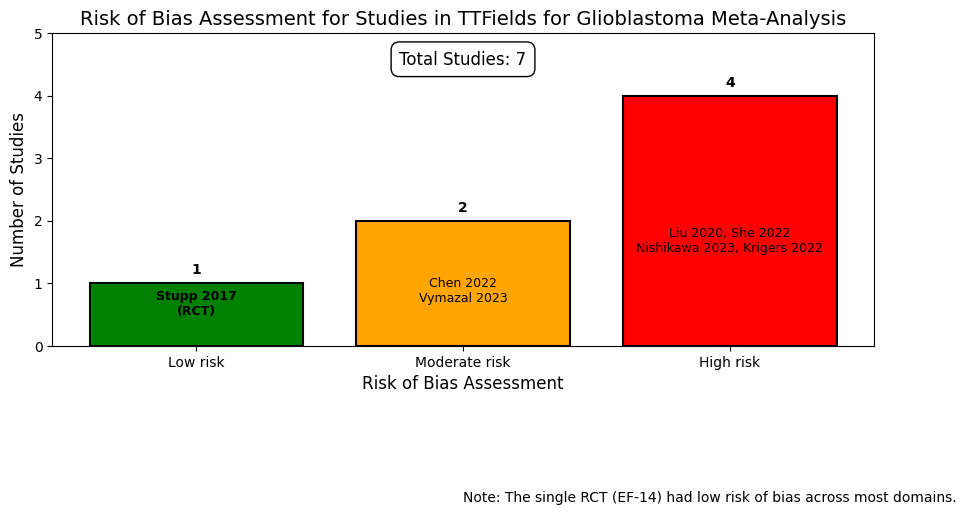

In [9]:
# Script 9: Risk of bias summary visualization
# Risk of bias assessment from the meta-analysis
# Source: ncbi.nlm.nih.gov/articles/PMC10462574

import matplotlib.pyplot as plt
import numpy as np

# Risk of bias categories and counts from the meta-analysis
categories = ["Low risk", "Moderate risk", "High risk"]
counts = [1, 2, 4]  # 1 study low, 2 moderate, 4 high risk
colors = ["green", "orange", "red"]

# Create stacked bar chart showing proportion of studies in each risk category
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height}', ha='center', va='bottom', fontweight='bold')

# Add study names within or near the bars
ax.text(0, 0.5, "Stupp 2017\n(RCT)", ha='center', fontsize=9, fontweight='bold')
ax.text(1, 0.7, "Chen 2022\nVymazal 2023", ha='center', fontsize=9)
ax.text(2, 1.5, "Liu 2020, She 2022\nNishikawa 2023, Krigers 2022", ha='center', fontsize=9)

# Labels and title
ax.set_xlabel('Risk of Bias Assessment', fontsize=12)
ax.set_ylabel('Number of Studies', fontsize=12)
ax.set_title('Risk of Bias Assessment for Studies in TTFields for Glioblastoma Meta-Analysis', fontsize=14)

# Add total studies annotation
ax.text(1, 4.5, f'Total Studies: {sum(counts)}', ha='center', fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Set y-axis limits to make room for text
ax.set_ylim(0, 5)

# Add note about limitations
ax.text(0.5, -0.5, "Note: The single RCT (EF-14) had low risk of bias across most domains.",
        ha='left', fontsize=10, transform=ax.transAxes)

plt.tight_layout()
plt.show()

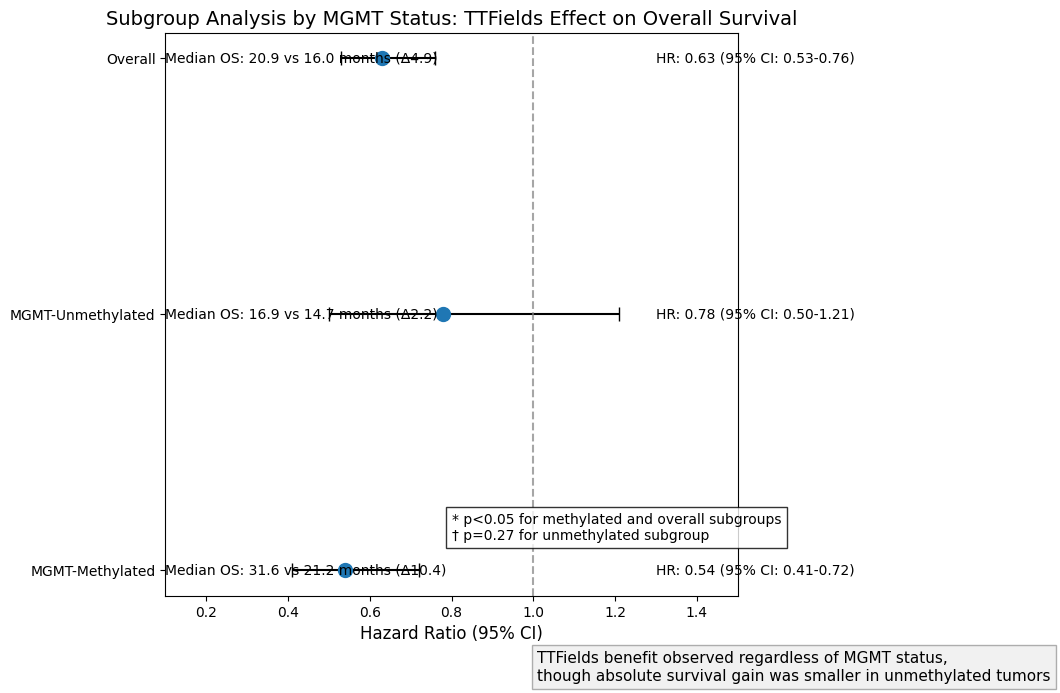

In [10]:
# Script 10: Subgroup analysis forest plot comparing methylated vs unmethylated responses
# Data from EF-14 trial subgroup analysis by MGMT status
# Source: ncbi.nlm.nih.gov/articles/PMC11883162

import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Define subgroups and their data
subgroups = ["MGMT-Methylated", "MGMT-Unmethylated", "Overall"]
hazard_ratios = [0.54, 0.78, 0.63]
ci_lower = [0.41, 0.50, 0.53]
ci_upper = [0.72, 1.21, 0.76]

# Additional outcome data
median_os_ttfields = [31.6, 16.9, 20.9]
median_os_control = [21.2, 14.7, 16.0]
abs_benefit = [10.4, 2.2, 4.9]

# Calculate error bars for plotting
lower_errors = [hr - low for hr, low in zip(hazard_ratios, ci_lower)]
upper_errors = [upp - hr for hr, upp in zip(hazard_ratios, ci_upper)]
errors = [lower_errors, upper_errors]

# Plot the forest plot
y_pos = np.arange(len(subgroups))
ax.errorbar(
    hazard_ratios, y_pos,
    xerr=errors,
    fmt='o',
    markersize=10,
    ecolor='black',
    capsize=5
)

# Add reference line at HR=1 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(subgroups)
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)
ax.set_title('Subgroup Analysis by MGMT Status: TTFields Effect on Overall Survival', fontsize=14)

# Add HR labels on the right
for i, (hr, low, high) in enumerate(zip(hazard_ratios, ci_lower, ci_upper)):
    ax.text(1.3, i, f'HR: {hr:.2f} (95% CI: {low:.2f}-{high:.2f})',
            va='center', fontsize=10)

# Add table with median OS data
table_text = []
for i, (subgroup, tt, ctrl, diff) in enumerate(zip(subgroups, median_os_ttfields, median_os_control, abs_benefit)):
    text = f'Median OS: {tt:.1f} vs {ctrl:.1f} months (Δ{diff:.1f})'
    ax.text(0.1, i, text, va='center', fontsize=10)

# Add annotation for statistical significance
ax.text(0.5, 0.1, '* p<0.05 for methylated and overall subgroups\n† p=0.27 for unmethylated subgroup',
        transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Add interpretation
ax.text(0.65, -0.15, 'TTFields benefit observed regardless of MGMT status,\nthough absolute survival gain was smaller in unmethylated tumors',
        transform=ax.transAxes, fontsize=11, bbox=dict(facecolor='lightgray', alpha=0.3))

# Set reasonable x-axis limits
ax.set_xlim(0.1, 1.5)

plt.tight_layout()
plt.show()